In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [30]:
data = pd.read_csv('C:\\Users\\dell\\Desktop\\housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
print ("Description : \n\n", data.describe())

Description : 

           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%

In [32]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


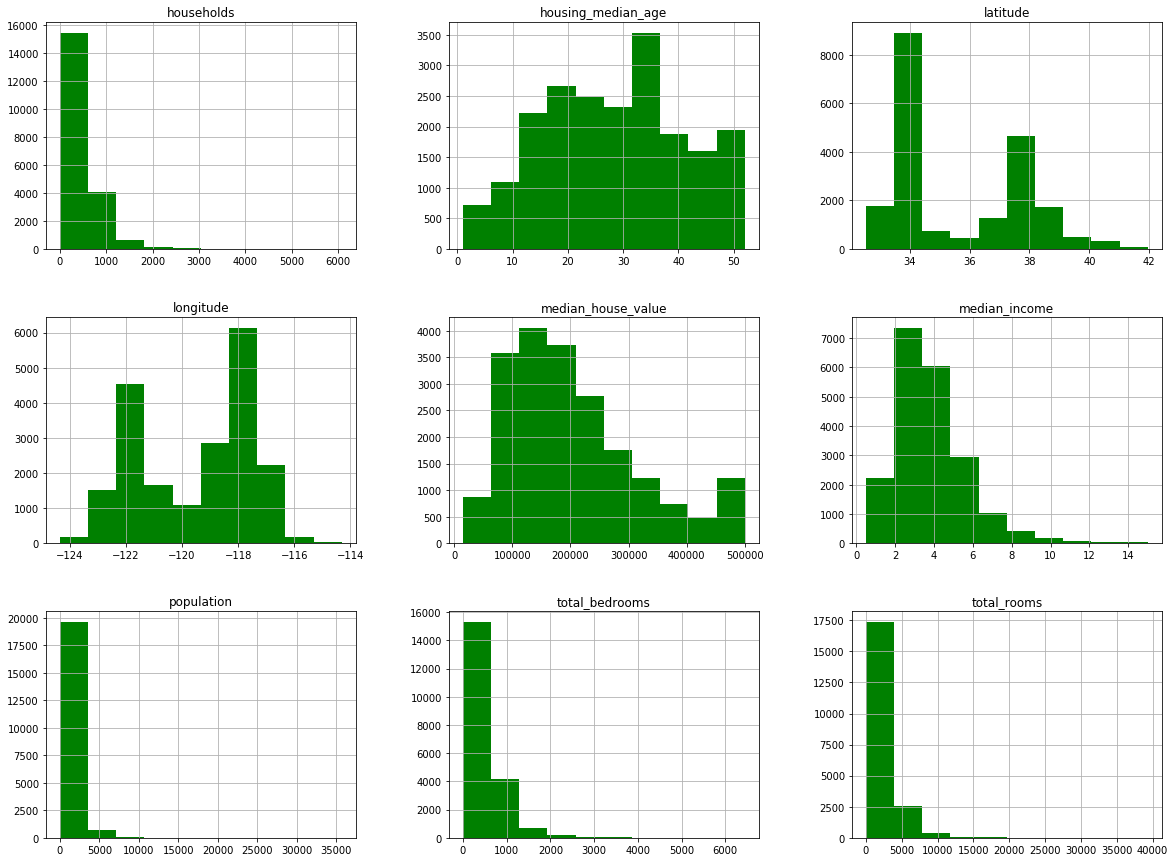

In [155]:
data.hist(figsize=(20,15), color = 'green')
plt.show()

# Check for NULL values

In [61]:
print('Let\'s check for null values\n')
print(data.isnull().sum())     

Let's check for null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [62]:
# Droping NaN value

In [77]:
data = data.dropna(axis=0)
print("\nNew Shape after dropping NULL value : ", data.shape)


New Shape after dropping NULL value :  (20433, 10)


In [78]:
print('Let\'s check for null values\n')
print(data.isnull().sum())  

Let's check for null values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Input Output Data

In [79]:
# Dropping ['median_house_value', ocean_proximity]
x_data = data.drop(data.columns[[8, 9]], axis = 1)

y_data = data['median_house_value']

In [80]:
x_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [81]:
y_data.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

# Train Test Split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=101)

# Scaling Data

In [83]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [85]:
x_train = pd.DataFrame(data = scaler.transform(x_train), columns = x_train.columns, index= x_train.index)

In [86]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2844,0.534861,0.304995,0.686275,0.037642,0.041124,0.017854,0.044894,0.232762
4483,0.613546,0.161530,0.901961,0.059057,0.101955,0.084560,0.097517,0.047372
11489,0.631474,0.123273,0.450980,0.098021,0.087834,0.048712,0.096530,0.465380
18990,0.235060,0.631243,0.313725,0.046340,0.053849,0.026094,0.049992,0.287720
4185,0.609562,0.168969,0.647059,0.015438,0.022967,0.011323,0.023680,0.281148


In [87]:
x_test = pd.DataFrame(data = scaler.transform(x_test), columns = x_test.columns, index= x_test.index)

In [88]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14561,0.710159,0.030818,0.313725,0.028537,0.028864,0.015415,0.033547,0.361733
1571,0.233068,0.562168,0.568627,0.099573,0.085040,0.037193,0.089295,0.418049
4201,0.608566,0.166844,0.745098,0.029147,0.053849,0.032456,0.054596,0.118398
4670,0.603586,0.160468,0.333333,0.091129,0.257604,0.146473,0.252097,0.092902
6251,0.635458,0.159405,0.607843,0.038278,0.045624,0.037081,0.053116,0.249590


# Creating Feature Columns in TensorFlow

In [90]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [110]:
longitude = tf.feature_column.numeric_column('longitude')
latitutde = tf.feature_column.numeric_column('latitude')
age = tf.feature_column.numeric_column('housing_median_age')
rooms = tf.feature_column.numeric_column('total_rooms')
bedroom = tf.feature_column.numeric_column('total_bedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('median_income')

In [111]:
# Aggregating the feature columns
feat_cols = [longitude, latitutde, age, rooms, bedroom, pop, households, income]

In [112]:
feat_cols

[_NumericColumn(key='longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='total_bedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

# Creating input 

In [113]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 20, num_epochs = 2000, shuffle = True)

# Creating the model using Deep Neural Nets Regression 

In [114]:
model = tf.estimator.DNNRegressor(hidden_units = [8, 8, 8, 8, 8], feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_task_type': 'worker', '_num_ps_replicas': 0, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020FE65E2D68>, '_save_summary_steps': 100, '_service': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\dell\\AppData\\Local\\Temp\\tmpsakmfsks', '_num_worker_replicas': 1, '_session_config': None}


# Training model for 50000 steps

In [116]:
model.train(input_fn = input_func, steps = 50000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\dell\AppData\Local\Temp\tmpsakmfsks\model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into C:\Users\dell\AppData\Local\Temp\tmpsakmfsks\model.ckpt.
INFO:tensorflow:loss = 1.32076e+12, step = 2
INFO:tensorflow:global_step/sec: 276.432
INFO:tensorflow:loss = 7.68072e+10, step = 102 (0.369 sec)
INFO:tensorflow:global_step/sec: 353.396
INFO:tensorflow:loss = 1.36973e+11, step = 202 (0.278 sec)
INFO:tensorflow:global_step/sec: 456.268
INFO:tensorflow:loss = 2.39454e+11, step = 302 (0.225 sec)
INFO:tensorflow:global_step/sec: 453.904
INFO:tensorflow:loss = 1.09996e+11, step = 402 (0.219 sec)
INFO:tensorflow:global_step/sec: 440.56
INFO:tensorflow:loss = 2.82035e+11, step = 502 (0.229 sec)
INFO:tensorflow:global_step/sec: 375.148
INFO:tensorflow:loss = 2.41101e+11, step = 602 (0.266 sec)
INFO:tensorflow:global_step/sec: 355.791
INFO:tensorflow:loss = 2.68159e+11, step = 702 (0.274 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 392.608
INFO:tensorflow:loss = 1.54374e+11, step = 8002 (0.258 sec)
INFO:tensorflow:global_step/sec: 386.542
INFO:tensorflow:loss = 1.6468e+11, step = 8102 (0.255 sec)
INFO:tensorflow:global_step/sec: 327.601
INFO:tensorflow:loss = 1.11036e+11, step = 8202 (0.309 sec)
INFO:tensorflow:global_step/sec: 365.822
INFO:tensorflow:loss = 1.12687e+11, step = 8302 (0.272 sec)
INFO:tensorflow:global_step/sec: 394.332
INFO:tensorflow:loss = 6.35464e+10, step = 8402 (0.252 sec)
INFO:tensorflow:global_step/sec: 315.382
INFO:tensorflow:loss = 7.9301e+10, step = 8502 (0.316 sec)
INFO:tensorflow:global_step/sec: 334.414
INFO:tensorflow:loss = 9.70071e+10, step = 8602 (0.298 sec)
INFO:tensorflow:global_step/sec: 427.118
INFO:tensorflow:loss = 6.96718e+10, step = 8702 (0.234 sec)
INFO:tensorflow:global_step/sec: 433.506
INFO:tensorflow:loss = 1.35109e+11, step = 8802 (0.231 sec)
INFO:tensorflow:global_step/sec: 309.353
INFO:tensorflow:loss = 1.3863e+11, step = 8902 (0.32

INFO:tensorflow:global_step/sec: 397.053
INFO:tensorflow:loss = 1.71063e+11, step = 16102 (0.249 sec)
INFO:tensorflow:global_step/sec: 286.51
INFO:tensorflow:loss = 7.86104e+10, step = 16202 (0.353 sec)
INFO:tensorflow:global_step/sec: 294.329
INFO:tensorflow:loss = 1.18035e+11, step = 16302 (0.338 sec)
INFO:tensorflow:global_step/sec: 383.391
INFO:tensorflow:loss = 1.36495e+11, step = 16402 (0.259 sec)
INFO:tensorflow:global_step/sec: 315.078
INFO:tensorflow:loss = 2.56019e+11, step = 16502 (0.325 sec)
INFO:tensorflow:global_step/sec: 296.065
INFO:tensorflow:loss = 1.07539e+11, step = 16602 (0.334 sec)
INFO:tensorflow:global_step/sec: 365.752
INFO:tensorflow:loss = 1.54699e+11, step = 16702 (0.268 sec)
INFO:tensorflow:global_step/sec: 351.055
INFO:tensorflow:loss = 1.55217e+11, step = 16802 (0.303 sec)
INFO:tensorflow:global_step/sec: 289.211
INFO:tensorflow:loss = 1.55401e+11, step = 16902 (0.334 sec)
INFO:tensorflow:global_step/sec: 345.721
INFO:tensorflow:loss = 8.47684e+10, step =

INFO:tensorflow:global_step/sec: 290.878
INFO:tensorflow:loss = 1.37997e+11, step = 24202 (0.349 sec)
INFO:tensorflow:global_step/sec: 361.292
INFO:tensorflow:loss = 7.5754e+10, step = 24302 (0.269 sec)
INFO:tensorflow:global_step/sec: 416.23
INFO:tensorflow:loss = 1.01078e+11, step = 24402 (0.241 sec)
INFO:tensorflow:global_step/sec: 413.042
INFO:tensorflow:loss = 7.26518e+10, step = 24502 (0.244 sec)
INFO:tensorflow:global_step/sec: 405.64
INFO:tensorflow:loss = 5.69263e+10, step = 24602 (0.244 sec)
INFO:tensorflow:global_step/sec: 467.104
INFO:tensorflow:loss = 1.12305e+11, step = 24702 (0.213 sec)
INFO:tensorflow:global_step/sec: 391.053
INFO:tensorflow:loss = 6.33281e+10, step = 24802 (0.262 sec)
INFO:tensorflow:global_step/sec: 336.882
INFO:tensorflow:loss = 6.5829e+10, step = 24902 (0.293 sec)
INFO:tensorflow:global_step/sec: 396.354
INFO:tensorflow:loss = 7.2592e+10, step = 25002 (0.250 sec)
INFO:tensorflow:global_step/sec: 371.616
INFO:tensorflow:loss = 7.85795e+10, step = 251

INFO:tensorflow:global_step/sec: 397.479
INFO:tensorflow:loss = 5.447e+10, step = 32302 (0.257 sec)
INFO:tensorflow:global_step/sec: 458.202
INFO:tensorflow:loss = 5.31314e+10, step = 32402 (0.224 sec)
INFO:tensorflow:global_step/sec: 339.319
INFO:tensorflow:loss = 5.48322e+10, step = 32502 (0.290 sec)
INFO:tensorflow:global_step/sec: 339.907
INFO:tensorflow:loss = 7.63181e+10, step = 32602 (0.299 sec)
INFO:tensorflow:global_step/sec: 303.769
INFO:tensorflow:loss = 8.03067e+10, step = 32702 (0.323 sec)
INFO:tensorflow:global_step/sec: 406.318
INFO:tensorflow:loss = 1.29749e+11, step = 32802 (0.241 sec)
INFO:tensorflow:global_step/sec: 336.2
INFO:tensorflow:loss = 6.30175e+10, step = 32902 (0.300 sec)
INFO:tensorflow:global_step/sec: 316.313
INFO:tensorflow:loss = 7.55708e+10, step = 33002 (0.316 sec)
INFO:tensorflow:global_step/sec: 366.632
INFO:tensorflow:loss = 5.30678e+10, step = 33102 (0.274 sec)
INFO:tensorflow:global_step/sec: 454.315
INFO:tensorflow:loss = 1.19369e+11, step = 33

INFO:tensorflow:global_step/sec: 357.206
INFO:tensorflow:loss = 1.33063e+11, step = 40402 (0.280 sec)
INFO:tensorflow:global_step/sec: 462.682
INFO:tensorflow:loss = 3.57098e+10, step = 40502 (0.224 sec)
INFO:tensorflow:global_step/sec: 469.592
INFO:tensorflow:loss = 2.19281e+11, step = 40602 (0.213 sec)
INFO:tensorflow:global_step/sec: 380.123
INFO:tensorflow:loss = 5.19757e+10, step = 40702 (0.258 sec)
INFO:tensorflow:global_step/sec: 354.946
INFO:tensorflow:loss = 1.56529e+11, step = 40802 (0.283 sec)
INFO:tensorflow:global_step/sec: 357.774
INFO:tensorflow:loss = 2.50077e+11, step = 40902 (0.278 sec)
INFO:tensorflow:global_step/sec: 422.022
INFO:tensorflow:loss = 4.14775e+10, step = 41002 (0.241 sec)
INFO:tensorflow:global_step/sec: 303.752
INFO:tensorflow:loss = 1.10847e+11, step = 41102 (0.326 sec)
INFO:tensorflow:global_step/sec: 462.5
INFO:tensorflow:loss = 8.82028e+10, step = 41202 (0.216 sec)
INFO:tensorflow:global_step/sec: 370.244
INFO:tensorflow:loss = 2.93139e+11, step = 

INFO:tensorflow:global_step/sec: 297.176
INFO:tensorflow:loss = 1.75337e+11, step = 48502 (0.338 sec)
INFO:tensorflow:global_step/sec: 392.58
INFO:tensorflow:loss = 9.09696e+10, step = 48602 (0.251 sec)
INFO:tensorflow:global_step/sec: 432.822
INFO:tensorflow:loss = 1.12885e+11, step = 48702 (0.231 sec)
INFO:tensorflow:global_step/sec: 463.434
INFO:tensorflow:loss = 7.41288e+10, step = 48802 (0.223 sec)
INFO:tensorflow:global_step/sec: 403.512
INFO:tensorflow:loss = 1.01633e+11, step = 48902 (0.251 sec)
INFO:tensorflow:global_step/sec: 403.845
INFO:tensorflow:loss = 7.77338e+10, step = 49002 (0.237 sec)
INFO:tensorflow:global_step/sec: 429.06
INFO:tensorflow:loss = 4.28306e+10, step = 49102 (0.233 sec)
INFO:tensorflow:global_step/sec: 450.169
INFO:tensorflow:loss = 1.4852e+11, step = 49202 (0.222 sec)
INFO:tensorflow:global_step/sec: 464.098
INFO:tensorflow:loss = 5.09536e+10, step = 49302 (0.221 sec)
INFO:tensorflow:global_step/sec: 394.009
INFO:tensorflow:loss = 1.19158e+11, step = 4

# Predicting the value

In [117]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size = 20, num_epochs = 1, shuffle = False)

In [125]:
pred_gen = model.predict(predict_input_func)    

In [126]:
predictions = list(pred_gen) 

INFO:tensorflow:Restoring parameters from C:\Users\dell\AppData\Local\Temp\tmpsakmfsks\model.ckpt-50001


In [127]:
predictions

[{'predictions': array([ 267460.5625], dtype=float32)},
 {'predictions': array([ 334506.71875], dtype=float32)},
 {'predictions': array([ 145572.734375], dtype=float32)},
 {'predictions': array([ 128191.1953125], dtype=float32)},
 {'predictions': array([ 208911.671875], dtype=float32)},
 {'predictions': array([ 193518.265625], dtype=float32)},
 {'predictions': array([ 94376.90625], dtype=float32)},
 {'predictions': array([ 208932.765625], dtype=float32)},
 {'predictions': array([ 312817.125], dtype=float32)},
 {'predictions': array([ 96447.28125], dtype=float32)},
 {'predictions': array([ 280024.0625], dtype=float32)},
 {'predictions': array([ 143924.453125], dtype=float32)},
 {'predictions': array([ 154915.765625], dtype=float32)},
 {'predictions': array([ 232674.890625], dtype=float32)},
 {'predictions': array([ 459669.0625], dtype=float32)},
 {'predictions': array([ 191432.140625], dtype=float32)},
 {'predictions': array([ 255314.859375], dtype=float32)},
 {'predictions': array([ 99

In [128]:
final_y_preds = []

for pred in predictions:
    final_y_preds.append(pred['predictions'])

In [132]:
final_y_preds

[array([ 267460.5625], dtype=float32),
 array([ 334506.71875], dtype=float32),
 array([ 145572.734375], dtype=float32),
 array([ 128191.1953125], dtype=float32),
 array([ 208911.671875], dtype=float32),
 array([ 193518.265625], dtype=float32),
 array([ 94376.90625], dtype=float32),
 array([ 208932.765625], dtype=float32),
 array([ 312817.125], dtype=float32),
 array([ 96447.28125], dtype=float32),
 array([ 280024.0625], dtype=float32),
 array([ 143924.453125], dtype=float32),
 array([ 154915.765625], dtype=float32),
 array([ 232674.890625], dtype=float32),
 array([ 459669.0625], dtype=float32),
 array([ 191432.140625], dtype=float32),
 array([ 255314.859375], dtype=float32),
 array([ 99693.5859375], dtype=float32),
 array([ 356709.875], dtype=float32),
 array([ 178471.5], dtype=float32),
 array([ 266401.875], dtype=float32),
 array([ 261759.15625], dtype=float32),
 array([ 137888.9375], dtype=float32),
 array([ 120080.4765625], dtype=float32),
 array([ 117428.9921875], dtype=float32),


In [133]:
# Fianl RMSE Value using DNN Regressor

In [135]:
mean_squared_error(y_test, final_y_preds) ** 0.5

72474.108532716637

                         RSME VALUE USING DNN REGRESSOR  = 72474.108532716637
                -> I have used Neural Net with 4 hidden layers, each having 8 input values 
                -> Model trained using batch_size = 20, num_epochs = 2000 and Steps = 50,000

# Working on Sklearn Models

# Random Forest Regressor

In [140]:
# Training Model
rf_regressor = RandomForestRegressor(n_estimators=500, random_state = 0)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [141]:
# Predicting the values
y_pred = rf_regressor.predict(x_test)

In [142]:
p = mean_squared_error(y_test, y_pred)
print(p ** 0.5)    

49775.266747


            RSME VALUE USING 
                -> Random Forest Regressor using 500 estimators =  49775.266747